In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pymongo import MongoClient
client = MongoClient('localhost')
db = client['crowdy']

In [2]:
db.collection_names()
hits = db.hits
ts = db.tasksets

## Task completion times

Let's compare basic stats for completion times between different conditions.

Note that it is not possible to easily measure the time spent on a task, because, unlike the input form on the tagging task, clicking the NR/SR/VR radio button is is instantaneous from focus to finish.

However, we can measure the amount of time that the *last* item was in focus. i.e. You click item A, and while you think about item B, A is still in focus.

This gives is rough estimates of the time spent, good enough for broad comparisons, but not robust enough to tie time an a s*specific* item.

In [32]:
time_search = ts.aggregate([
    {'$match':{'meta.test':False, 'meta.type':'relevance judgments'}},
    {'$unwind':'$tasks'},
    {'$project':{
                'timeSpent':'$tasks.timeSpent',
                'design': '$meta.design', 
                'condition': '$meta.condition'
            }},
])
times = pd.DataFrame(list(time_search))
# Ignore the 'training' condition, because we're interested in the tasks *after* training
times = times.query('condition != "training"')
times

,_id,condition,design,timeSpent
0,35BLDD71I6XXX1TB5KU49V2713VVZJ,basic,basic,0.583
1,35BLDD71I6XXX1TB5KU49V2713VVZJ,basic,basic,0.514
2,3GDTJDAPVUBZNIYFI2T09FMQBDZM8Z,postTraining,basic,1.882
3,31EUONYN2V3LYXF43BJNTXV3H6COV8,feedback,basic,1.856
4,3Y54SXRO1LL1YAVCU2VHRLZ727KUTB,feedback,basic,1.086
5,3AAPLD8UCCHWTOPSU3NP3H0IGFIHTN,basic,basic,4.072
6,3AAPLD8UCCHWTOPSU3NP3H0IGFIHTN,basic,basic,12.114
7,3AAPLD8UCCHWTOPSU3NP3H0IGFIHTN,basic,basic,43.465
8,3AAPLD8UCCHWTOPSU3NP3H0IGFIHTN,basic,basic,7.433
9,3AAPLD8UCCHWTOPSU3NP3H0IGFIHTN,basic,basic,16.604


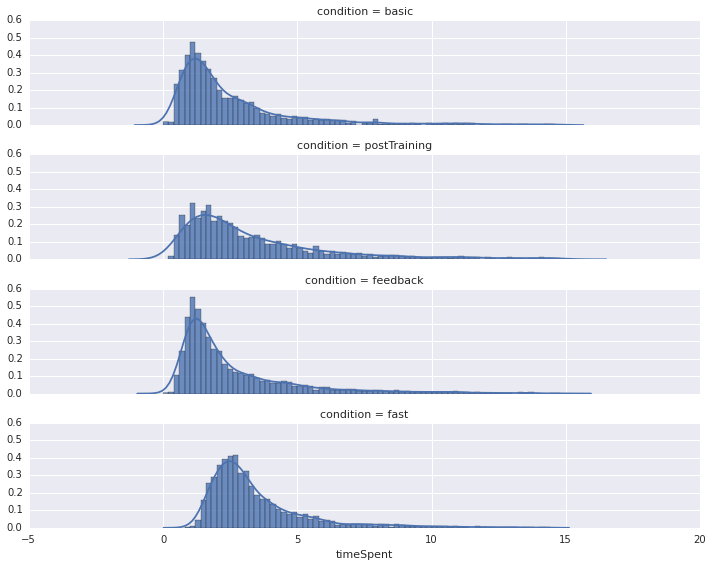

In [33]:
g = sns.FacetGrid(times.query('timeSpent < 15'), row='condition', size=2, aspect=5, margin_titles=False)
g.map(sns.distplot, "timeSpent", 
      kde=True, rug=False, 
      hist_kws={'alpha':0.8}, 
      bins=np.arange(0, 15, 0.2)) \
    .savefig("../images/relevanceTime1.png")

The raw stats

In [7]:
groups = times[['timeSpent', 'condition']].groupby('condition')
groups.agg([np.mean, 
            np.median, 
            np.var,
            len
           ])

timeSpent                        
                  mean median        var   len
condition                                     
basic         2.984218  1.788  15.387690  1894
fast          3.590551  2.910   5.297531  1921
feedback      2.900985  1.791   9.898070  3318
postTraining  4.365769  2.538  55.202162  1806

In [25]:
conditions =  times['condition'].unique()
conditions
for x in conditions:
    xtimes = times[times['condition'] == x]['timeSpent']
    for y in conditions:
        if x == y:
            break
        ytimes = times[times['condition'] == y]['timeSpent']
        print x, y, stats.mannwhitneyu(xtimes,ytimes)

feedback basic MannwhitneyuResult(statistic=3002449.0, pvalue=0.0037515632418110715)
fast basic MannwhitneyuResult(statistic=1115435.5, pvalue=2.1493884568875132e-95)
fast feedback MannwhitneyuResult(statistic=2057360.5, pvalue=5.2627723415792524e-102)
postTraining basic MannwhitneyuResult(statistic=145612.5, pvalue=5.1778435582882852e-27)
postTraining feedback MannwhitneyuResult(statistic=231223.5, pvalue=5.0621861099200367e-36)
postTraining fast MannwhitneyuResult(statistic=71748.0, pvalue=3.8688223052577004e-78)


# By user

One way to account for disproportionate influence by any given worker is to represent each worker as a since mean. That is, reducing each worker to a single data point summarizing their average time spent.

In [27]:
time_search = ts.aggregate([
    {'$match':{'meta.test':False, 'meta.type':'relevance judgments'}},
    {'$unwind':'$tasks'},
    {'$project':{
                'user': 1,
                'timeSpent':'$tasks.timeSpent',
                'design': '$meta.design', 
                'condition': '$meta.condition'
            }},
    {'$group':{'_id':{'user':'$user', 'design':'$design', 'condition':'$condition'}, 
               'timeSpent':{'$avg':'$timeSpent'}}},
    {'$project':{'user':'$_id.user', 'timeSpent':1,
                'design':'$_id.design', 'condition':'$_id.condition'}}
])
times = pd.DataFrame(list(time_search))
# Ignore the 'training' condition, because we're interested in the tasks *after* training
times_user = times.query('condition != "training"')
times_user

,_id,condition,design,timeSpent,user
0,"{u'design': u'basic', u'user': u'A1NM7ZPZ3NH41...",postTraining,basic,2.227250,A1NM7ZPZ3NH412
1,"{u'design': u'basic', u'user': u'AC1TSLJCYFUYK...",postTraining,basic,5.627160,AC1TSLJCYFUYK
2,"{u'design': u'basic', u'user': u'AURYD2FH3FUOQ...",postTraining,basic,4.712752,AURYD2FH3FUOQ
3,"{u'design': u'basic', u'user': u'A16JER6OVKLOM...",postTraining,basic,8.563665,A16JER6OVKLOMC
5,"{u'design': u'basic', u'user': u'AFSJI5O9NK3YM...",postTraining,basic,8.890200,AFSJI5O9NK3YM
6,"{u'design': u'basic', u'user': u'AOTCPS24JM5DQ...",postTraining,basic,0.602300,AOTCPS24JM5DQ
8,"{u'design': u'basic', u'user': u'A2IUT0610X9CV...",postTraining,basic,2.208600,A2IUT0610X9CV0
11,"{u'design': u'basic', u'user': u'A3MWV912LNFD6...",postTraining,basic,1.151200,A3MWV912LNFD67
13,"{u'design': u'basic', u'user': u'A3NSX46VYD9J4...",postTraining,basic,0.000000,A3NSX46VYD9J49
14,"{u'design': u'basic', u'user': u'A2JOR5PFVZGCS...",postTraining,basic,0.840300,A2JOR5PFVZGCST


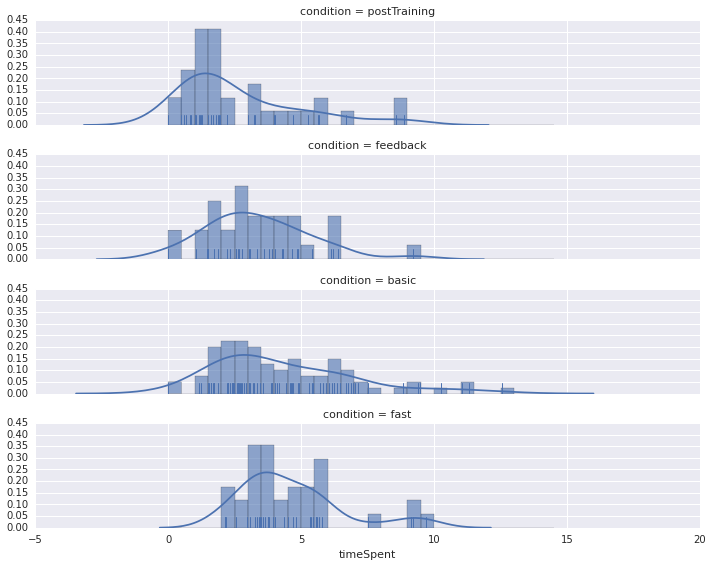

In [47]:
g = sns.FacetGrid(times_user, row='condition', size=2, aspect=5, margin_titles=False)
g.map(sns.distplot, "timeSpent", 
      kde=True, rug=True, 
      hist_kws={'alpha':0.6}, 
      rug_kws={'height':0.1},
      bins=np.arange(0, 15, 0.5)) \
    .savefig("../images/relevanceTimeUser.png")

In [36]:
groups = times_user[['timeSpent', 'condition']].groupby('condition')
groups.agg([np.mean, 
            np.median, 
            np.var,
            len
           ])

timeSpent                       
                  mean   median       var len
condition                                    
basic         4.319940  3.71977  6.895326  80
fast          4.612090  3.98536  3.728305  34
feedback      3.377600  3.06262  3.890751  32
postTraining  2.682241  1.83485  5.217703  34